## Exploratry Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import squarify
import warnings


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.shape

(209499, 43)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [5]:
df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [6]:
df.tail()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit
209498,ID_TZ99999,19,Male,11th grade,Local government,High school,Never married,Black,All other,Children or Armed Forces,...,US,MSA to MSA,Same,Same county,Same county,No,South,Florida,1987.72,Below limit


In [7]:
df.isnull()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
1,False,False,False,False,True,True,False,False,False,False,...,False,False,True,False,False,False,True,True,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,True,True,False,False
3,False,False,False,False,True,True,False,False,False,False,...,False,False,True,False,False,False,True,True,False,False
4,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
209495,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
209496,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
209497,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,True,True,False,False


In [8]:
df.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,209499.0,34.518728,22.306738,0.00,15.00,33.00,50.00,90.0
employment_stat,209499.0,0.176760,0.555562,0.00,0.00,0.00,0.00,2.0
wage_per_hour,209499.0,55.433487,276.757327,0.00,0.00,0.00,0.00,9999.0
working_week_per_year,209499.0,23.158850,24.397963,0.00,0.00,8.00,52.00,52.0
industry_code,209499.0,15.332398,18.049655,0.00,0.00,0.00,33.00,51.0
occupation_code,209499.0,11.321734,14.460839,0.00,0.00,0.00,26.00,46.0
total_employed,209499.0,1.956067,2.365154,0.00,0.00,1.00,4.00,6.0
vet_benefit,209499.0,1.515854,0.850853,0.00,2.00,2.00,2.00,2.0
gains,209499.0,435.926887,4696.359500,0.00,0.00,0.00,0.00,99999.0
losses,209499.0,36.881737,270.383302,0.00,0.00,0.00,0.00,4608.0


In [10]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 13
Discrete feature Count 4
Continuous feature Count 9
Categorical feature Count 30


In [11]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.24 %
education_institute               93.65 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
unemployment_reason               96.89 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.42 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.45 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
under_18_family                   72.39 %
veterans_admin_questionnaire      

In [12]:
df.replace({' ?':np.nan},inplace=True)

In [13]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.24 %
education_institute               93.65 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
unemployment_reason               96.89 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.42 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.45 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
under_18_family                   72.39 %
veterans_admin_questionnaire      

In [14]:
def plot_count(df: pd.core.frame.DataFrame, col: str, title_name: str='Train') -> None:
    # Set background color
    plt.rcParams['figure.facecolor'] = '#FFFAF0'

    f, ax = plt.subplots(1, 2, figsize=(12, 6))
    plt.subplots_adjust(wspace=0.1)

    s1 = df[col].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    outer_colors = ['#9E3F00', '#eb5e00', '#ff781f']
    inner_colors = ['#ff6905', '#ff8838', '#ffa66b']

    ax[0].pie(
        outer_sizes,colors=outer_colors,
        labels=s1.index.tolist(),
        startangle=90, frame=True, radius=1.4,
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'white'},
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size': 13,
        'weight': 'bold',
        'color': 'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = s1.index.tolist()
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette='YlOrBr_r', orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',
        which='both',
        bottom=False,
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i+0.1, str(v), color='black', fontweight='bold', fontsize=12)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()
    plt.rcParams['figure.facecolor'] = '#FFFFFF'

C:\Users\Win\AppData\Local\Temp\ipykernel_10912\3173692152.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


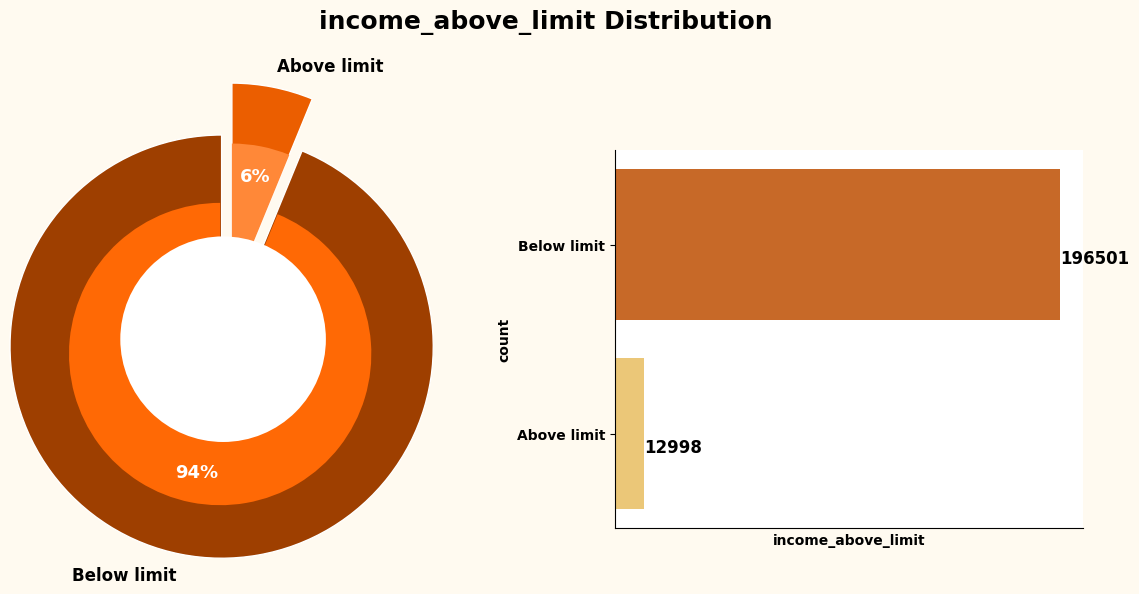

In [15]:
plot_count(df, 'income_above_limit', 'income_above_limit Distribution')

C:\Users\Win\AppData\Local\Temp\ipykernel_10912\927040720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_employed.index, y=total_employed.values, palette='bright', ax=axs[0,0])
C:\Users\Win\AppData\Local\Temp\ipykernel_10912\927040720.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income.index, y=income.values, palette='bright', ax=axs[0,1])
C:\Users\Win\AppData\Local\Temp\ipykernel_10912\927040720.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=citizenship.index,x=citizenship.values,palette='bright',ax=axs[1,0])


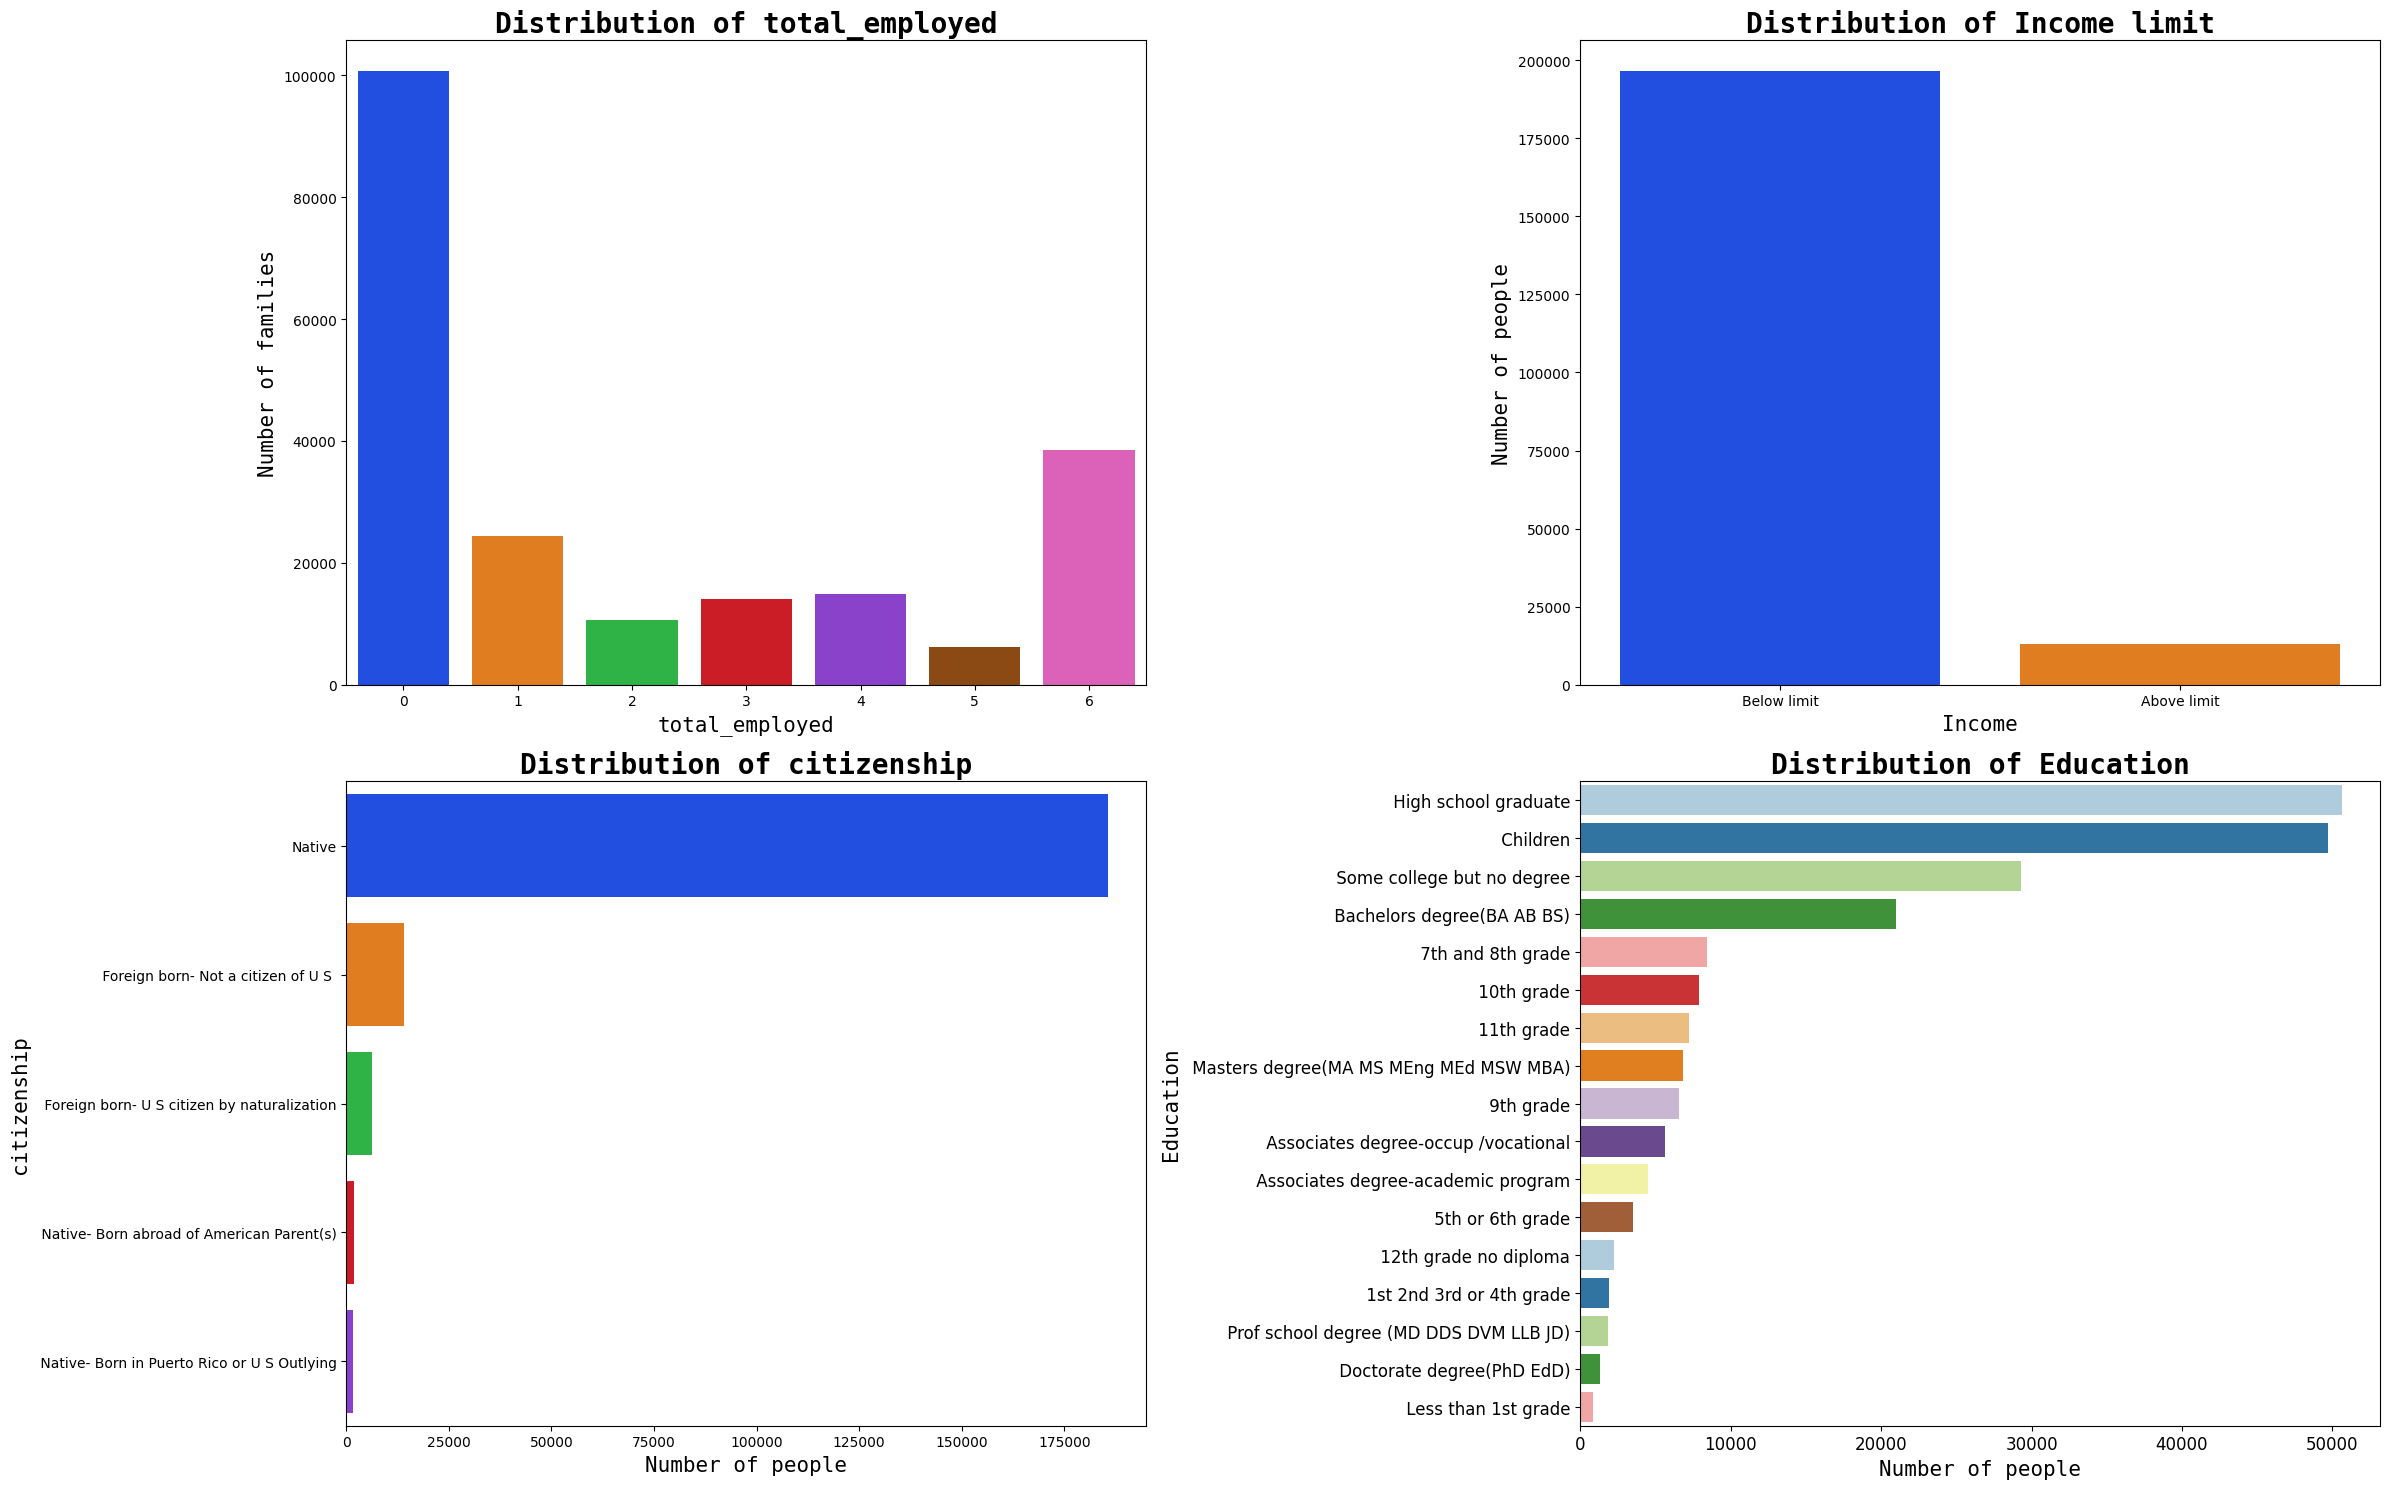

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(24, 15))

# Distribution of total_employed
total_employed = df['total_employed'].value_counts()
sns.barplot(x=total_employed.index, y=total_employed.values, palette='bright', ax=axs[0,0])
axs[0,0].set_title('Distribution of total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,0].set_xlabel('total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,0].set_ylabel('Number of families', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,0].tick_params(labelsize=10)

# Distribution of Income limit
income = df['income_above_limit'].value_counts()
sns.barplot(x=income.index, y=income.values, palette='bright', ax=axs[0,1])
axs[0,1].set_title('Distribution of Income limit', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,1].set_xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,1].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,1].tick_params(labelsize=10)

citizenship = df['citizenship'].value_counts()
sns.barplot(y=citizenship.index,x=citizenship.values,palette='bright',ax=axs[1,0])
axs[1,0].set_title('Distribution of citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,0].set_ylabel('citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,0].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,0].tick_params(labelsize=10)

edu = df['education'].value_counts()
sns.barplot(x=edu.values, y=edu.index, palette='Paired',ax=axs[1,1])
axs[1,1].set_title('Distribution of Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,1].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,1].set_ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,1].tick_params(labelsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
edu_df = df.copy(deep=True)

edu_df['education'].value_counts()

education
 High school graduate                      50627
 Children                                  49685
 Some college but no degree                29320
 Bachelors degree(BA AB BS)                20979
 7th and 8th grade                          8438
 10th grade                                 7905
 11th grade                                 7260
 Masters degree(MA MS MEng MEd MSW MBA)     6861
 9th grade                                  6540
 Associates degree-occup /vocational        5650
 Associates degree-academic program         4494
 5th or 6th grade                           3542
 12th grade no diploma                      2282
 1st 2nd 3rd or 4th grade                   1917
 Prof school degree (MD DDS DVM LLB JD)     1852
 Doctorate degree(PhD EdD)                  1318
 Less than 1st grade                         829
Name: count, dtype: int64

In [18]:
edu_df['education'].unique()

array([' High school graduate', ' 12th grade no diploma', ' Children',
       ' Bachelors degree(BA AB BS)', ' 7th and 8th grade', ' 11th grade',
       ' 9th grade', ' Masters degree(MA MS MEng MEd MSW MBA)',
       ' 10th grade', ' Associates degree-academic program',
       ' 1st 2nd 3rd or 4th grade', ' Some college but no degree',
       ' Less than 1st grade', ' Associates degree-occup /vocational',
       ' Prof school degree (MD DDS DVM LLB JD)', ' 5th or 6th grade',
       ' Doctorate degree(PhD EdD)'], dtype=object)

C:\Users\Win\AppData\Local\Temp\ipykernel_10912\313766427.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu.values, y=edu.index, palette='Paired')


<Axes: ylabel='education'>

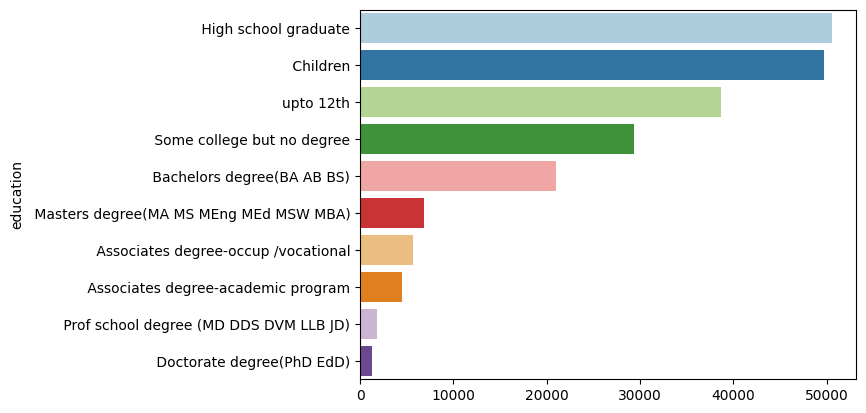

In [19]:
edu_df.replace({' 7th and 8th grade':'upto 12th',' Less than 1st grade':'upto 12th',' 1st 2nd 3rd or 4th grade':'upto 12th',
                ' 5th or 6th grade':'upto 12th',' 9th grade':'upto 12th',' 11th grade':'upto 12th',
                ' 10th grade':'upto 12th',' 12th grade no diploma':'upto 12th'},inplace=True)

edu = edu_df['education'].value_counts()
sns.barplot(x=edu.values, y=edu.index, palette='Paired')

In [20]:
print('Income below limit for people upto 12th:',len(edu_df.loc[(edu_df['education']=='upto 12th') & (edu_df['income_above_limit']=='Below limit')])/len(edu_df.loc[(edu_df['education']=='upto 12th')]) * 100, '%')
print('Income above limit for people upto 12th:',len(edu_df.loc[(edu_df['education']=='upto 12th') & (edu_df['income_above_limit']=='Above limit')])/len(edu_df.loc[(edu_df['education']=='upto 12th')]) * 100, '%')

Income below limit for people upto 12th: 99.111409604009 %
Income above limit for people upto 12th: 0.8885903959910109 %


In [21]:
print('Native citizenship having income below limit:',len(df.loc[(df['citizenship']=='Native') & (df['income_above_limit']=='Below limit')])/len(df.loc[(edu_df['citizenship']=='Native')]) * 100, '%')
print('Non-Native citizenship having income below limit:',len(df.loc[(df['citizenship']!='Native') & (df['income_above_limit']=='Below limit')])/len(df.loc[(edu_df['citizenship']!='Native')]) * 100, '%')

Native citizenship having income below limit: 93.69307746581282 %
Non-Native citizenship having income below limit: 94.5950482584977 %


In [22]:
print('Employed more than 1 but income is below limit:',len(df.loc[(df['total_employed']>1) & (df['income_above_limit']=='Below limit')])/len(df.loc[(edu_df['total_employed']>1)]) * 100, '%')
print('Employed only 1 but income is below limit:',len(df.loc[(df['total_employed']==1) & (df['income_above_limit']=='Below limit')])/len(df.loc[(edu_df['total_employed']==1)]) * 100, '%')
print('None employed and income is below limit:',len(df.loc[(df['total_employed']==0) & (df['income_above_limit']=='Below limit')])/len(df.loc[(edu_df['total_employed']==0)]) * 100, '%')

Employed more than 1 but income is below limit: 87.92360338172259 %
Employed only 1 but income is below limit: 91.140123988997 %
None employed and income is below limit: 99.36337994597172 %


In [23]:
print('People above income limit with more than 1 employed:',len(df.loc[(df['total_employed']>1) & (df['income_above_limit']=='Above limit')]))
print('People above income limit with only 1 employed:',len(df.loc[(df['total_employed']==1) & (df['income_above_limit']=='Above limit')]))

People above income limit with more than 1 employed: 10199
People above income limit with only 1 employed: 2158


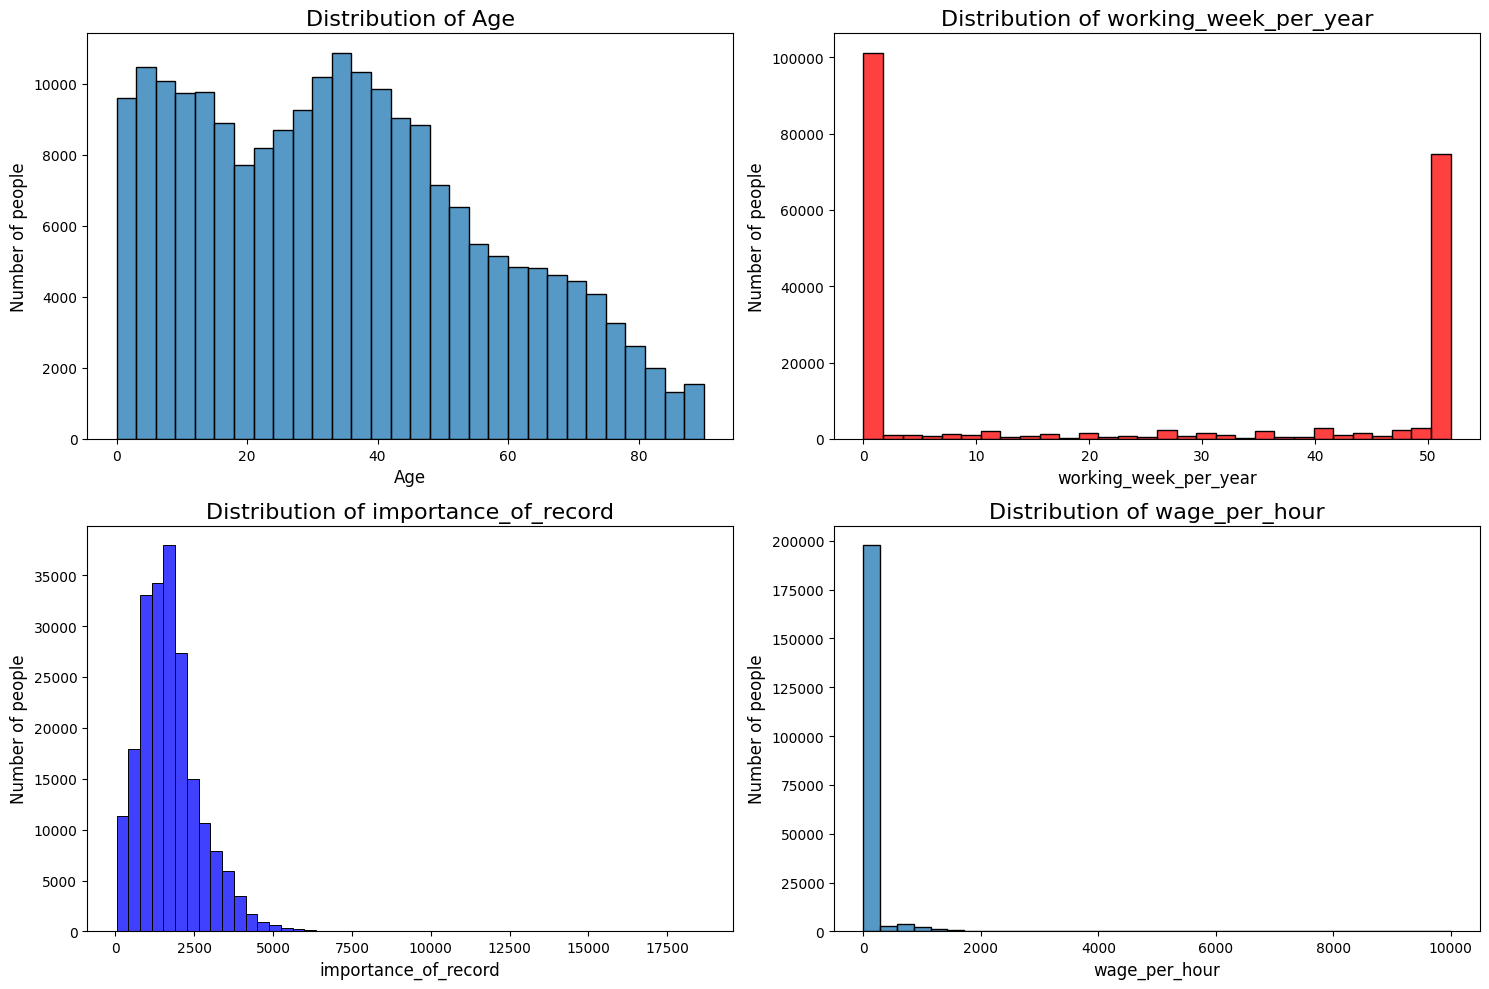

In [24]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot the distribution of Age
sns.histplot(df['age'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age', fontsize=16)
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of working_week_per_year
sns.histplot(df['working_week_per_year'], bins=30, color='red', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of working_week_per_year', fontsize=16)
axes[0, 1].set_xlabel('working_week_per_year', fontsize=12)
axes[0, 1].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of importance_of_record
sns.histplot(df['importance_of_record'], bins=50, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of importance_of_record', fontsize=16)
axes[1, 0].set_xlabel('importance_of_record', fontsize=12)
axes[1, 0].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of wage_per_hour
sns.histplot(df['wage_per_hour'], bins=35, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of wage_per_hour', fontsize=16)
axes[1, 1].set_xlabel('wage_per_hour', fontsize=12)
axes[1, 1].set_ylabel('Number of people', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

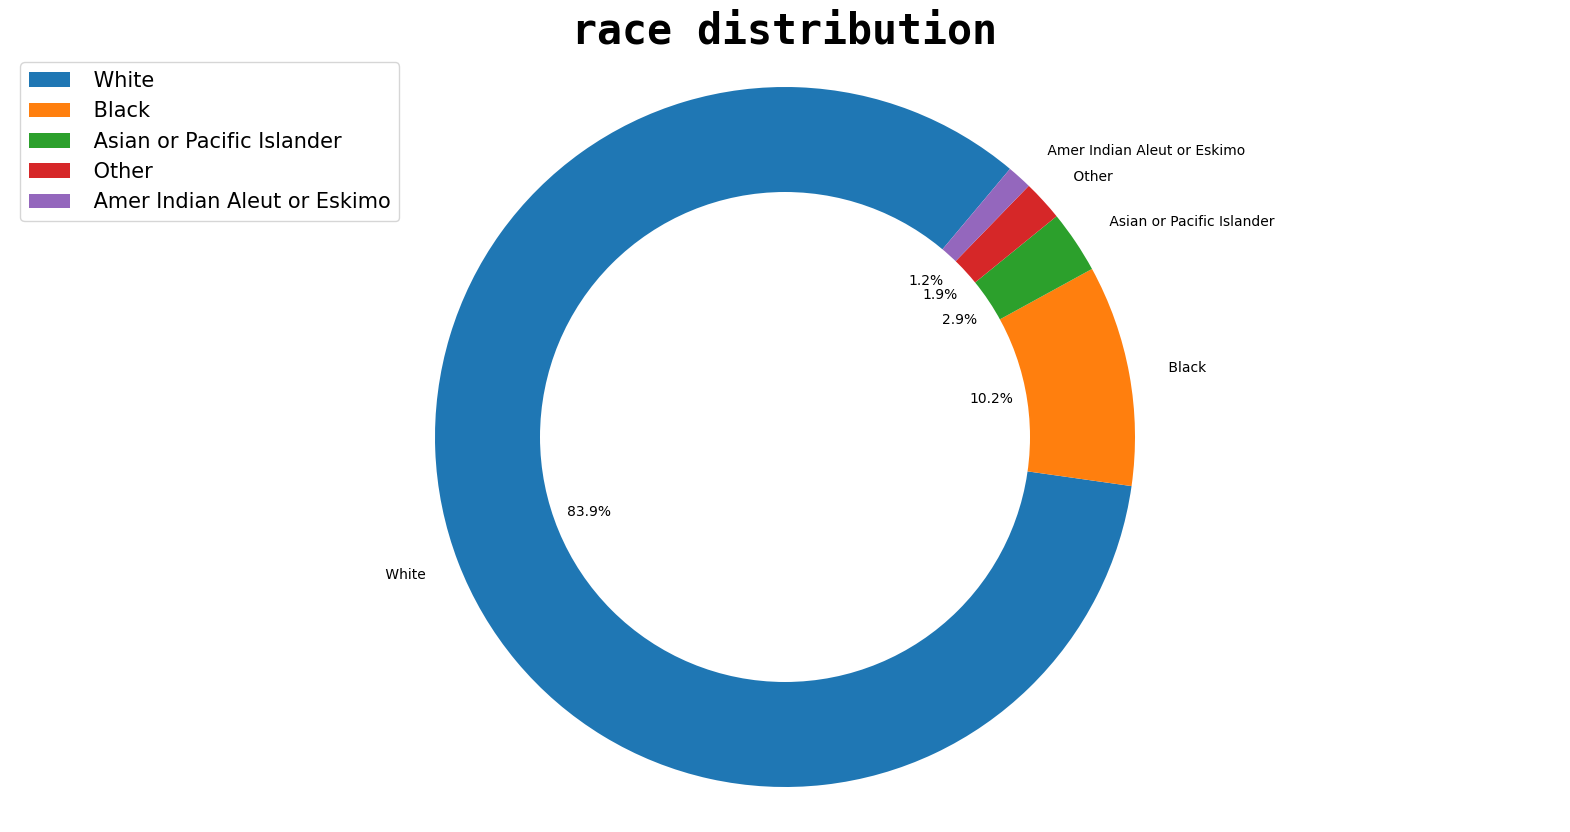

In [25]:
race = df['race'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(race.values, labels=race.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15},loc='upper left')
plt.show()

In [26]:
df['race'].unique()

array([' White', ' Black', ' Asian or Pacific Islander',
       ' Amer Indian Aleut or Eskimo', ' Other'], dtype=object)

In [27]:
print('Whites having income below limit:',len(df.loc[(df['race']==' White') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['race']==' White')]) * 100, '%')
print('Non-Whites having income below limit:',len(df.loc[(df['race']!=' White') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['race']!=' White')]) * 100, '%')

Whites having income below limit: 93.26272416324719 %
Non-Whites having income below limit: 96.56703166617342 %


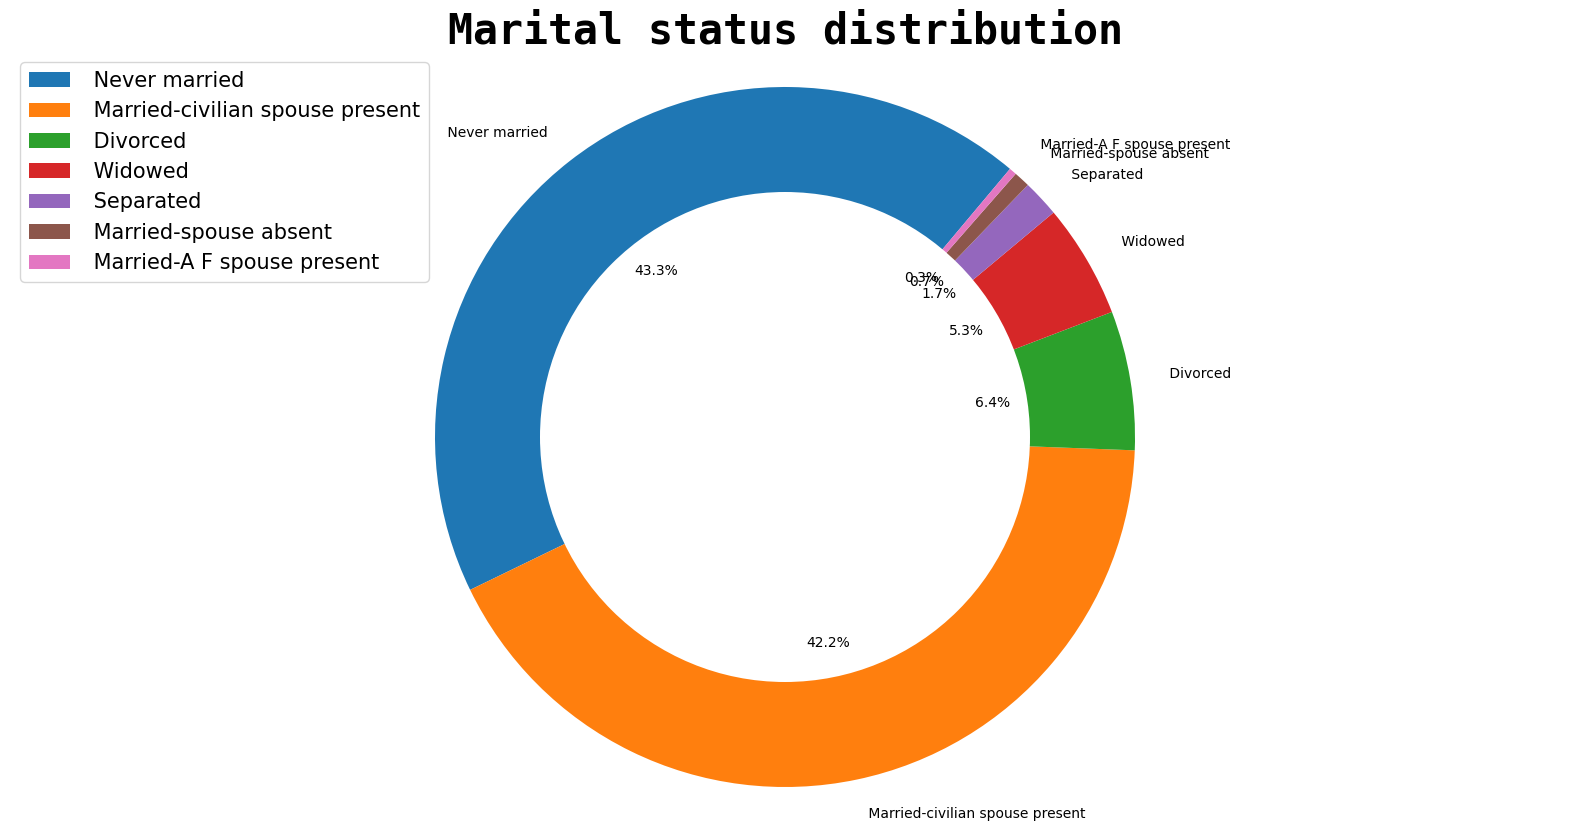

In [28]:
# Creating a donut chart for 'Marital status'
marital = df['marital_status'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(marital.values, labels=marital.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Marital status distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15},loc='upper left')
plt.show()

C:\Users\Win\AppData\Local\Temp\ipykernel_10912\307918954.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(country_of_birth_own.index, rotation=90)


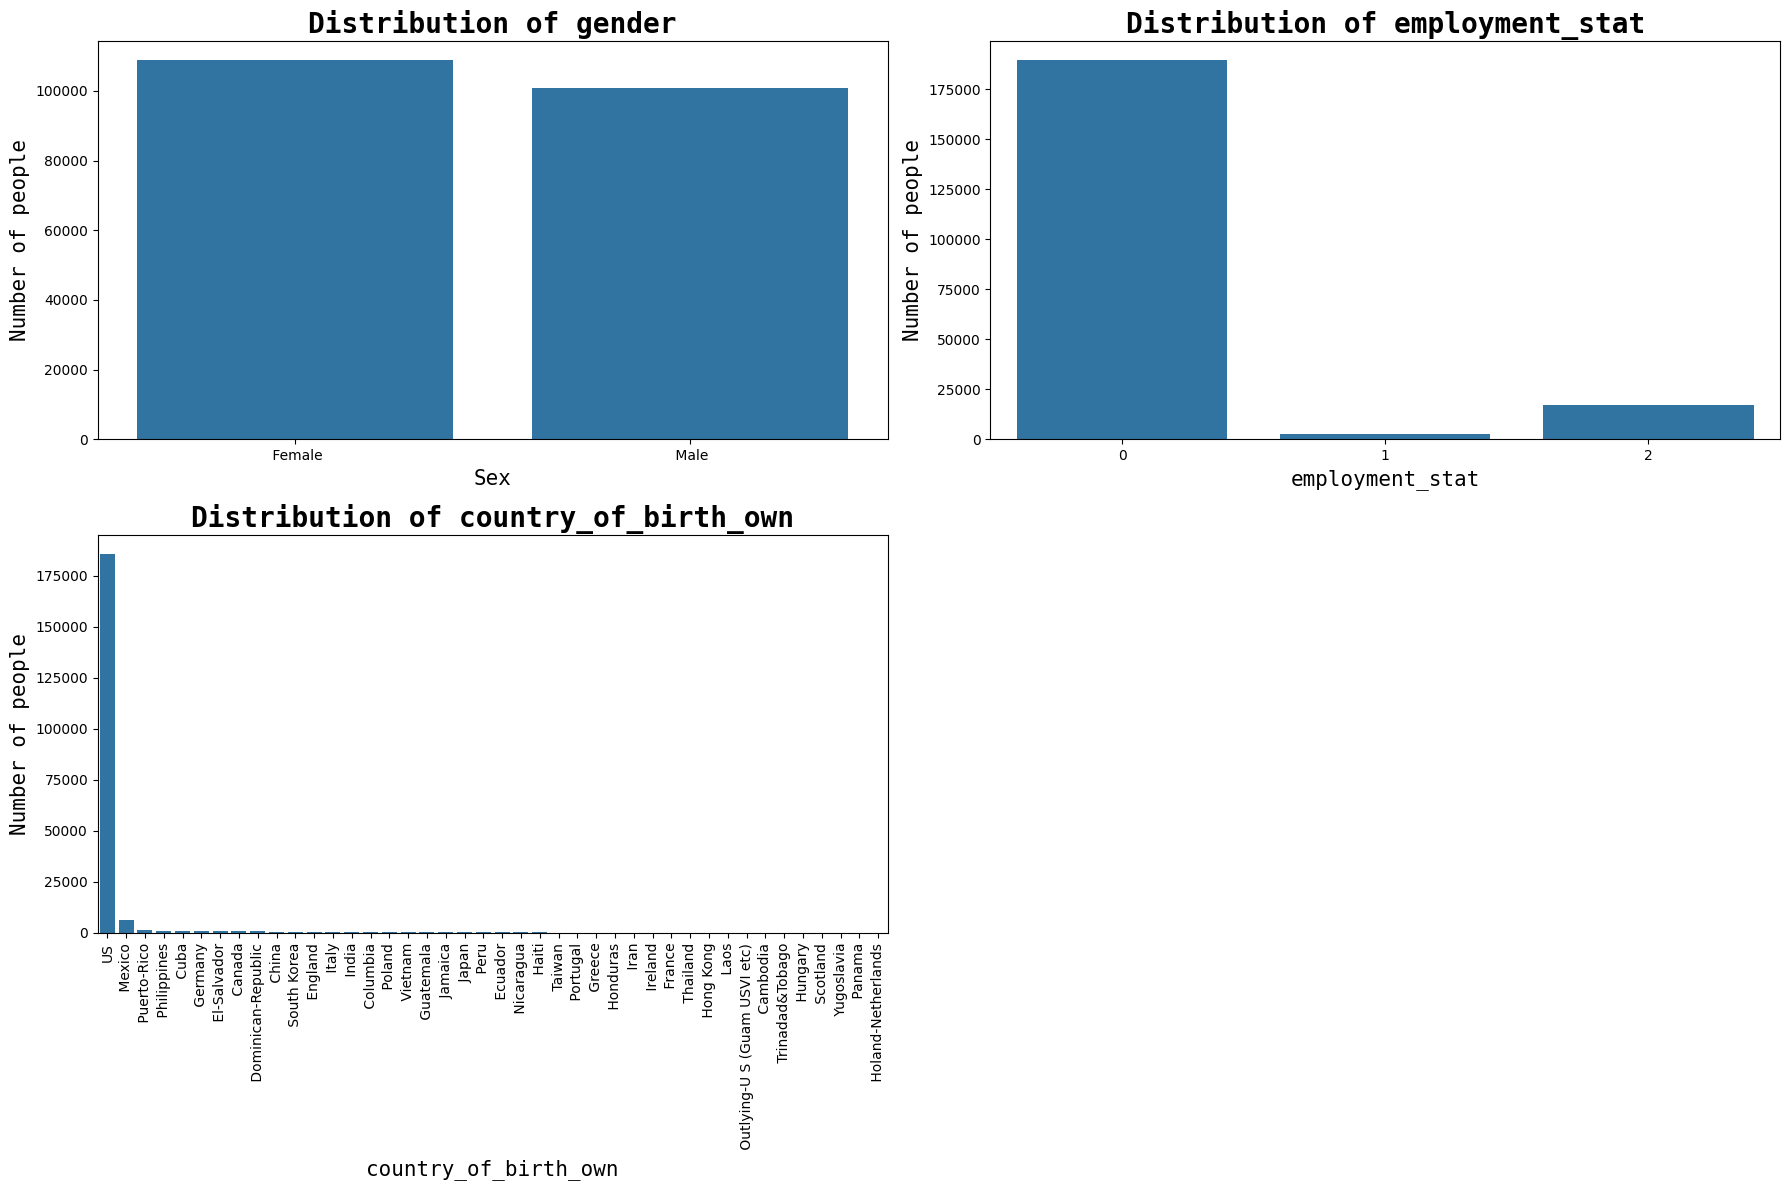

In [29]:
fig, axes = plt.subplots(2,2,figsize=(18, 12))

# Plot the distribution of gender
gender = df['gender'].value_counts()
sns.barplot(x=gender.index, y=gender.values, ax=axes[0,0])
axes[0,0].set_title('Distribution of gender', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,0].set_xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].tick_params(labelsize=10)

# Plot the distribution of employment_stat
employment_stat = df['employment_stat'].value_counts()
sns.barplot(x=employment_stat.index, y=employment_stat.values, ax=axes[0,1])
axes[0,1].set_title('Distribution of employment_stat', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,1].set_xlabel('employment_stat', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].tick_params(labelsize=10)

# Plot the distribution of country_of_birth_own
country_of_birth_own = df['country_of_birth_own'].value_counts()
sns.barplot(x=country_of_birth_own.index, y=country_of_birth_own.values, ax=axes[1,0])
axes[1,0].set_title('Distribution of country_of_birth_own', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[1,0].set_xlabel('country_of_birth_own', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].tick_params(labelsize=10)
axes[1,0].set_xticklabels(country_of_birth_own.index, rotation=90)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [30]:
print('Males with income below limit:',len(df.loc[(df['gender']==' Male') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['gender']==' Male')]) * 100, '%')
print('Females with income below limit:',len(df.loc[(df['gender']!=' Male') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['gender']!=' Male')]) * 100, '%')

Males with income below limit: 89.86248324479969 %
Females with income below limit: 97.43712310633916 %


In [31]:
print('Males with income below limit:',len(df.loc[(df['gender']==' Male') & (df['income_above_limit']=='Below limit')]))
print('Females with income below limit:',len(df.loc[(df['gender']!=' Male') & (df['income_above_limit']=='Below limit')]))

Males with income below limit: 90505
Females with income below limit: 105996


C:\Users\Win\AppData\Local\Temp\ipykernel_10912\51490064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=is_hispanic.values, y=is_hispanic.index, palette='rainbow', ax=axes[0,0])
C:\Users\Win\AppData\Local\Temp\ipykernel_10912\51490064.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=employment_commitment.values, y=employment_commitment.index, palette='rainbow', ax=axes[0,1])
C:\Users\Win\AppData\Local\Temp\ipykernel_10912\51490064.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_code_main.values, y=industry_code_m

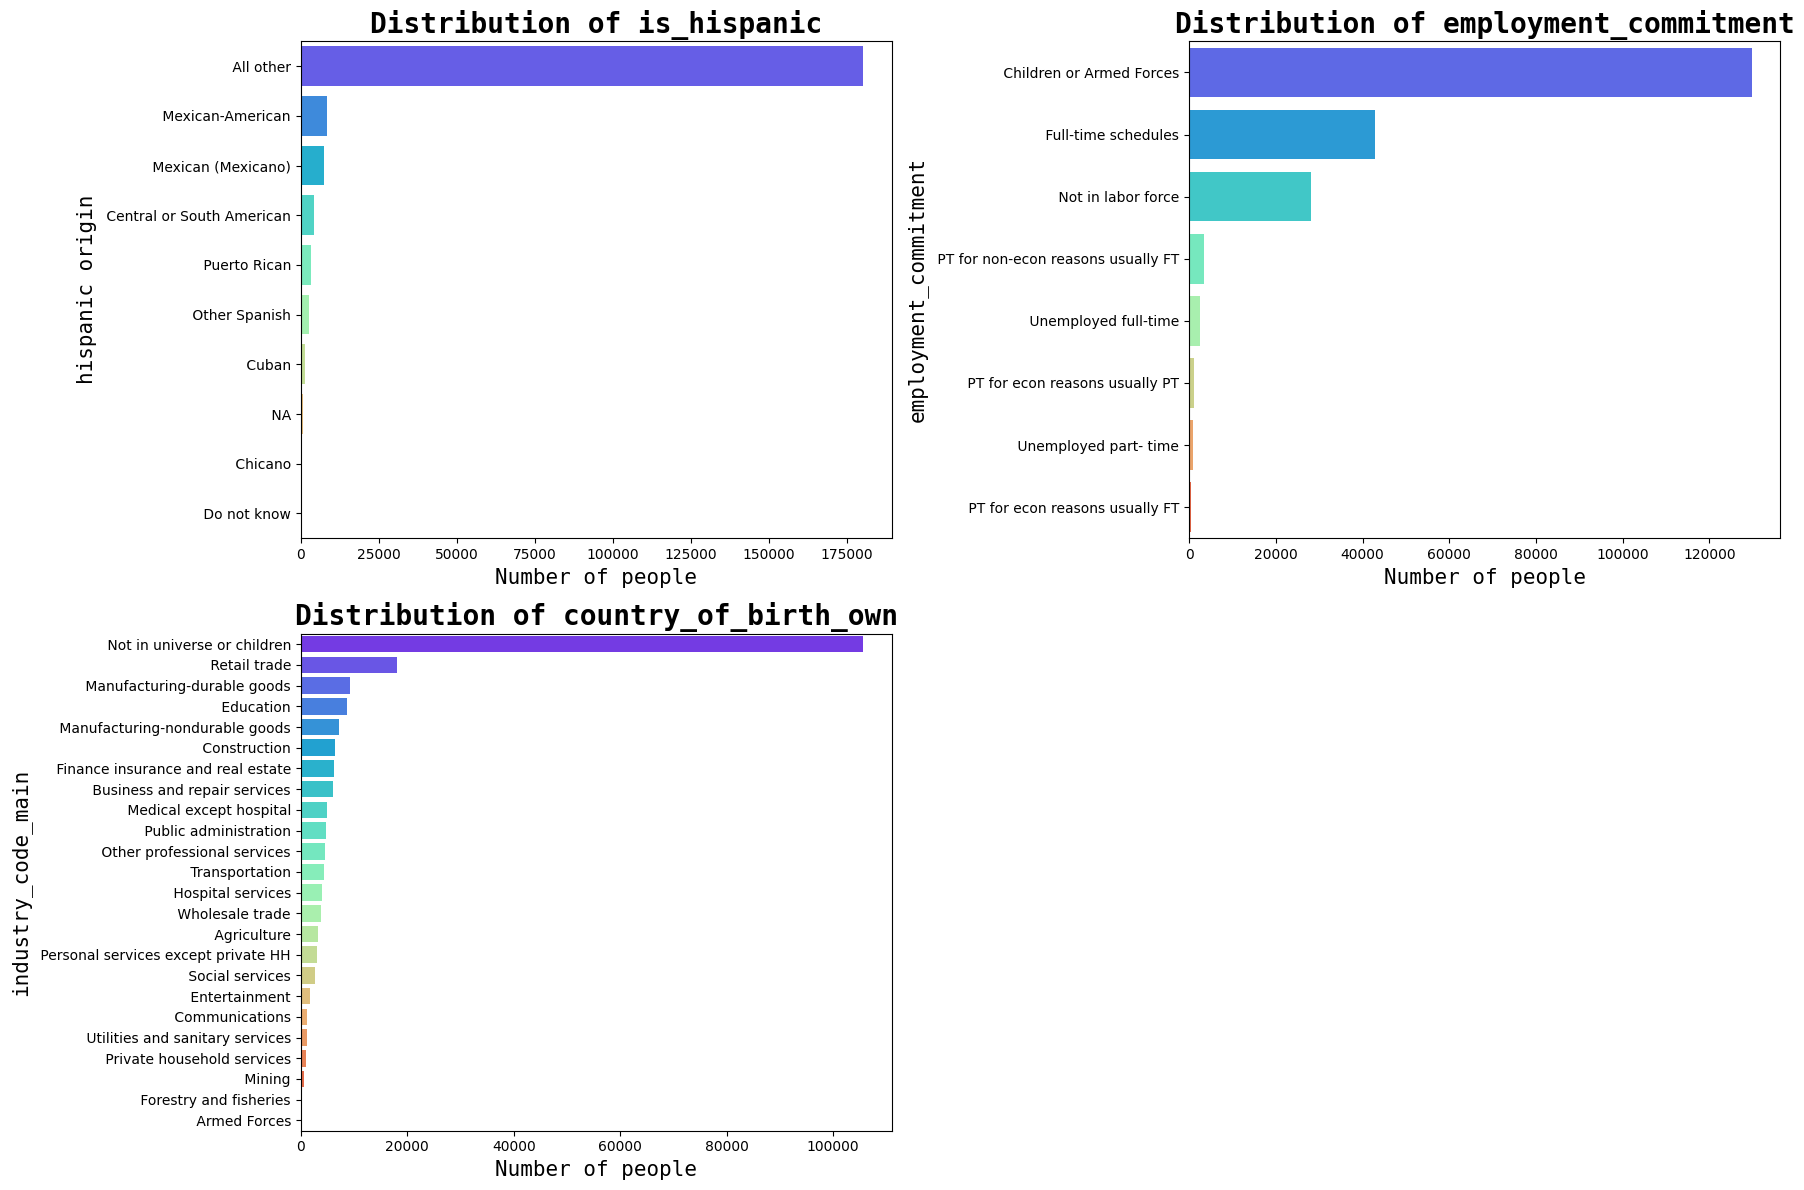

In [32]:
fig, axes = plt.subplots(2,2,figsize=(18, 12))

# Plot the distribution of gender
is_hispanic = df['is_hispanic'].value_counts()
sns.barplot(x=is_hispanic.values, y=is_hispanic.index, palette='rainbow', ax=axes[0,0])
axes[0,0].set_title('Distribution of is_hispanic', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,0].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].set_ylabel('hispanic origin', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].tick_params(labelsize=10)

# Plot the distribution of employment_stat
employment_commitment = df['employment_commitment'].value_counts()
sns.barplot(x=employment_commitment.values, y=employment_commitment.index, palette='rainbow', ax=axes[0,1])
axes[0,1].set_title('Distribution of employment_commitment', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,1].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].set_ylabel('employment_commitment', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].tick_params(labelsize=10)

# Plot the distribution of country_of_birth_own
industry_code_main = df['industry_code_main'].value_counts()
sns.barplot(x=industry_code_main.values, y=industry_code_main.index, palette='rainbow', ax=axes[1,0])
axes[1,0].set_title('Distribution of country_of_birth_own', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[1,0].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].set_ylabel('industry_code_main', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].tick_params(labelsize=10)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

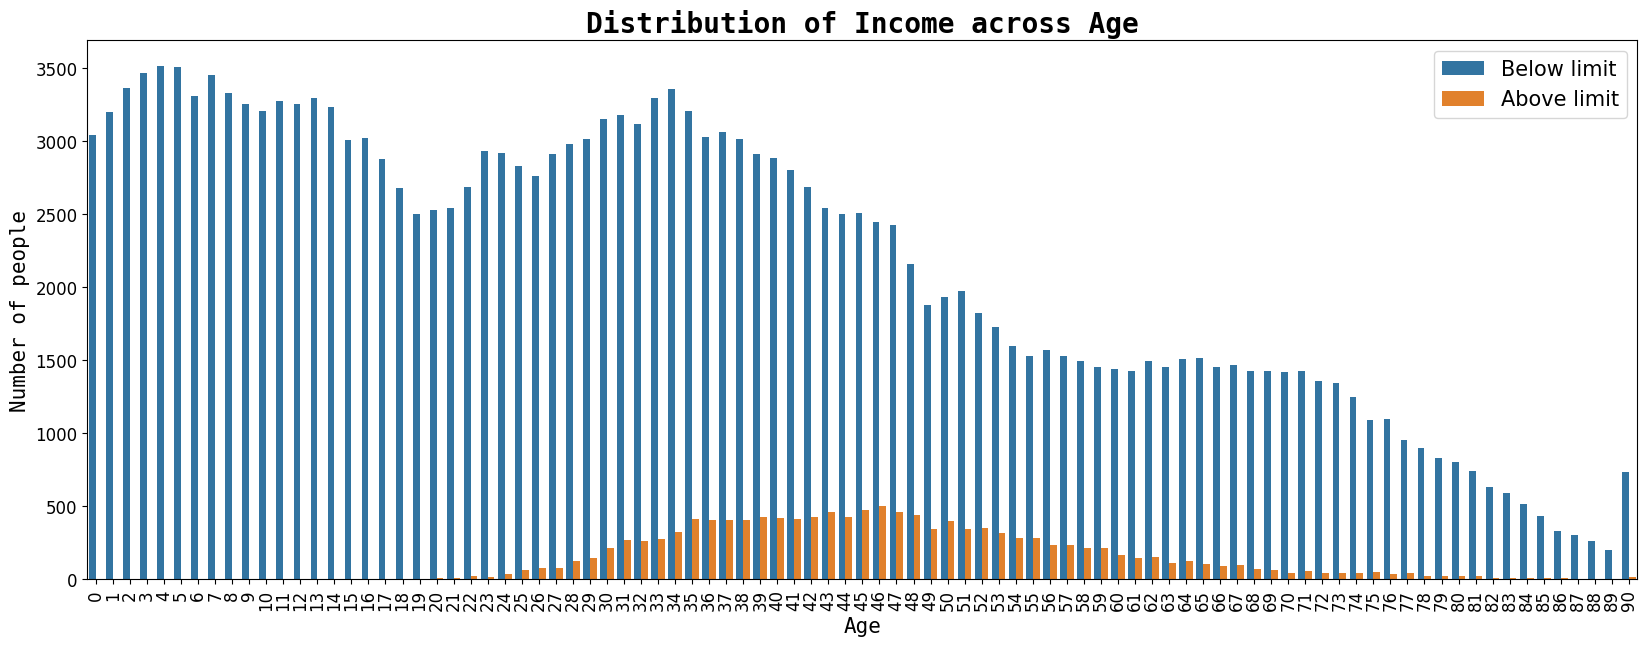

In [33]:
# Creating a countplot of income across age
plt.figure(figsize=(20, 7))
sns.countplot(x=df['age'], hue=df['income_above_limit'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

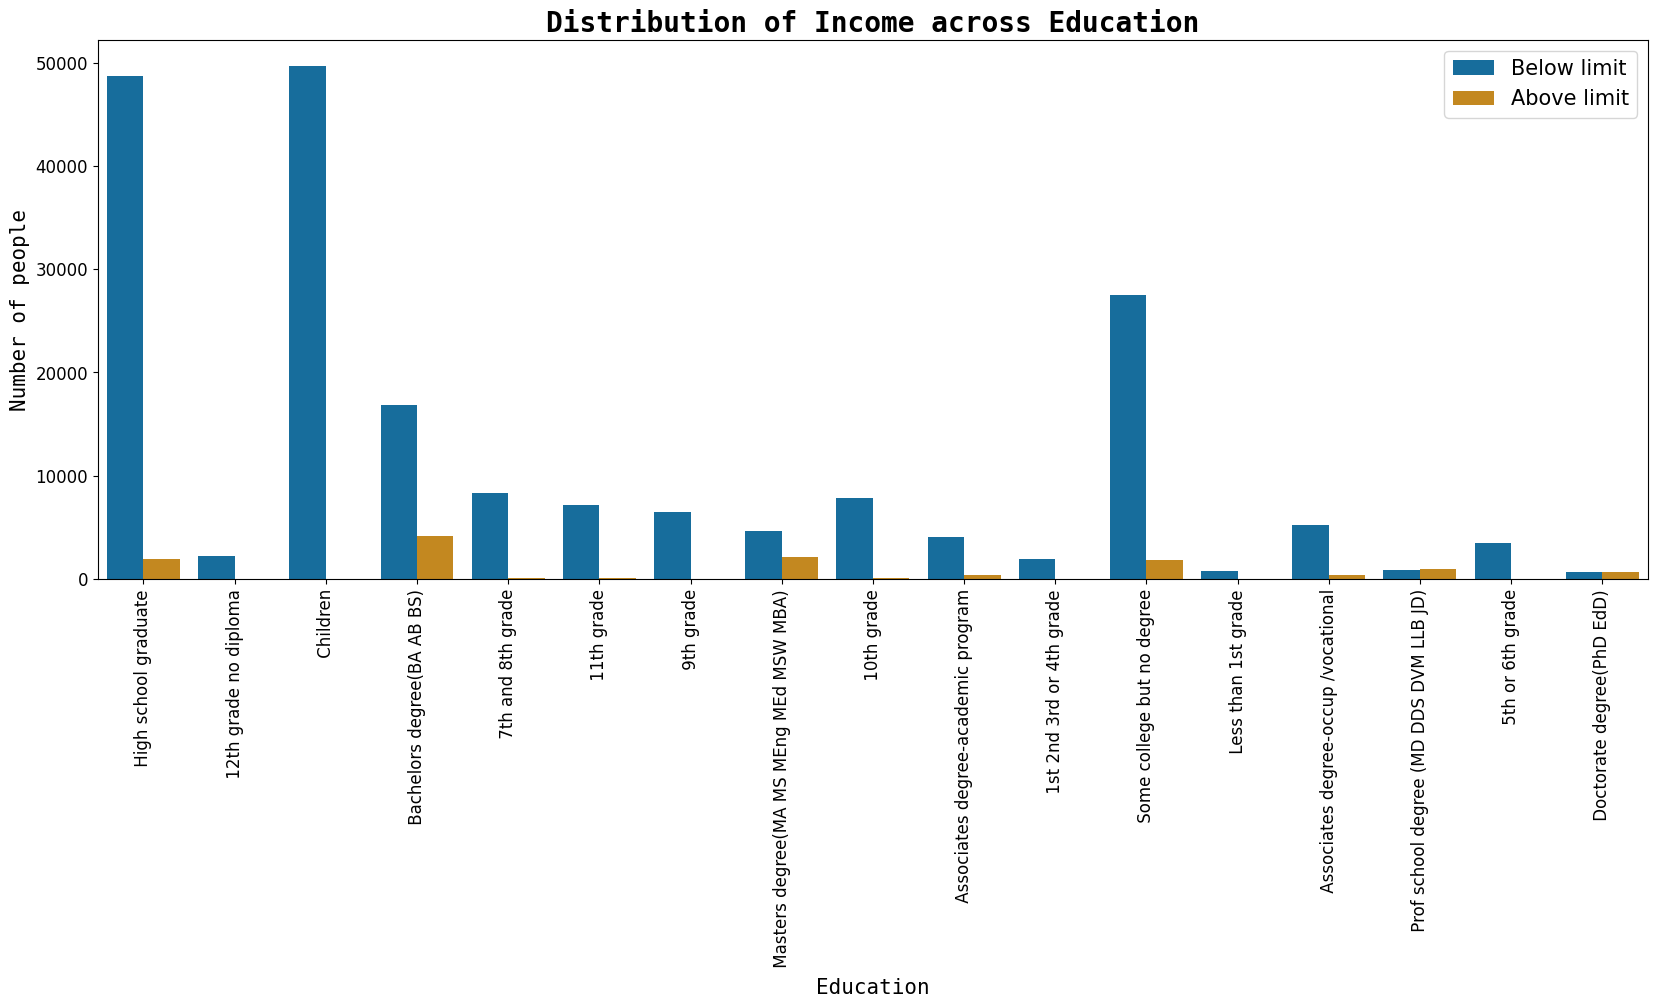

In [34]:
# Creating a countplot of income across education
plt.figure(figsize=(20, 7))
sns.countplot(x=df['education'],
              hue=df['income_above_limit'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

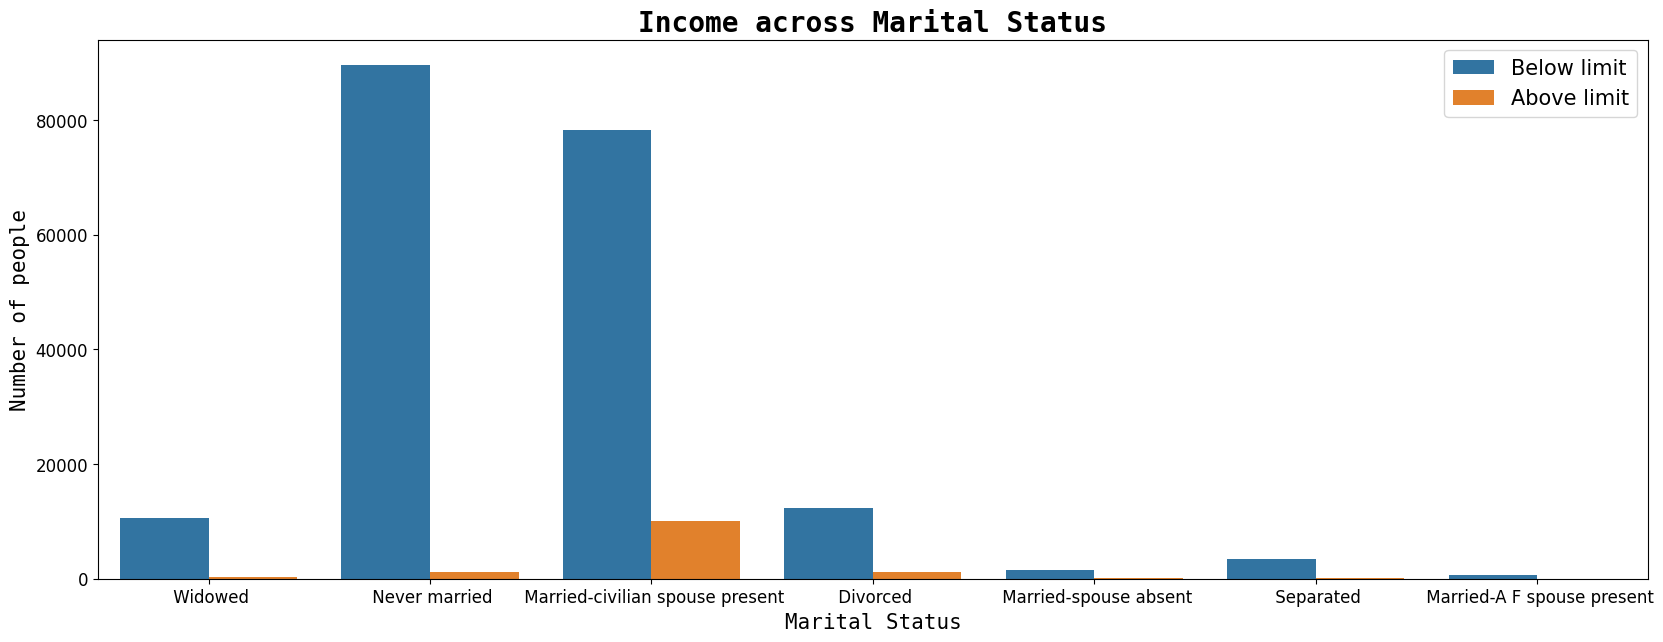

In [35]:
# Creating a countplot of income across Marital Status
plt.figure(figsize=(20, 7))
sns.countplot(x=df['marital_status'], hue=df['income_above_limit'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

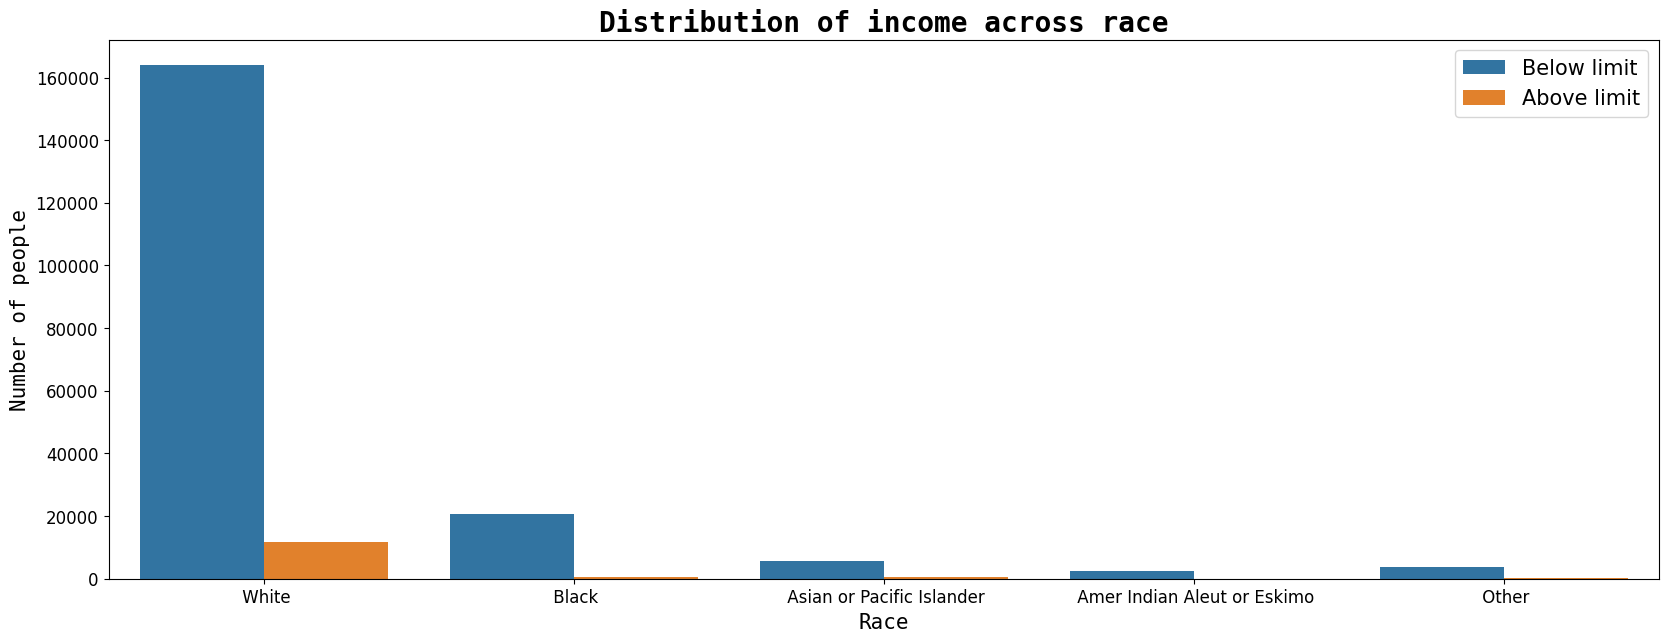

In [36]:
# Creating a countplot of income across race
plt.figure(figsize=(20, 7))
sns.countplot(x=df['race'], hue=df['income_above_limit'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

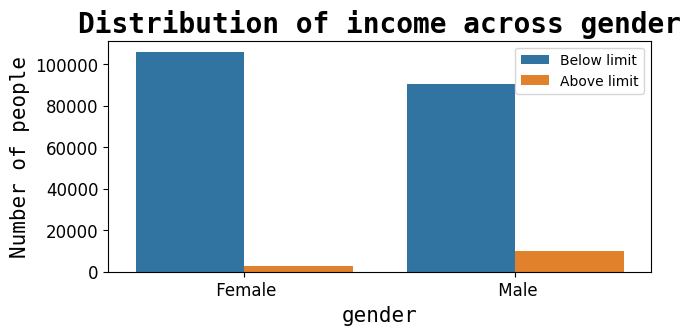

In [37]:
# Creating a countplot of income across gender
plt.figure(figsize=(7, 3))
sns.countplot(x=df['gender'], hue=df['income_above_limit'])
plt.title('Distribution of income across gender', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('gender', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

In [38]:
df.replace({'Below limit':0,'Above limit':1},inplace=True)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

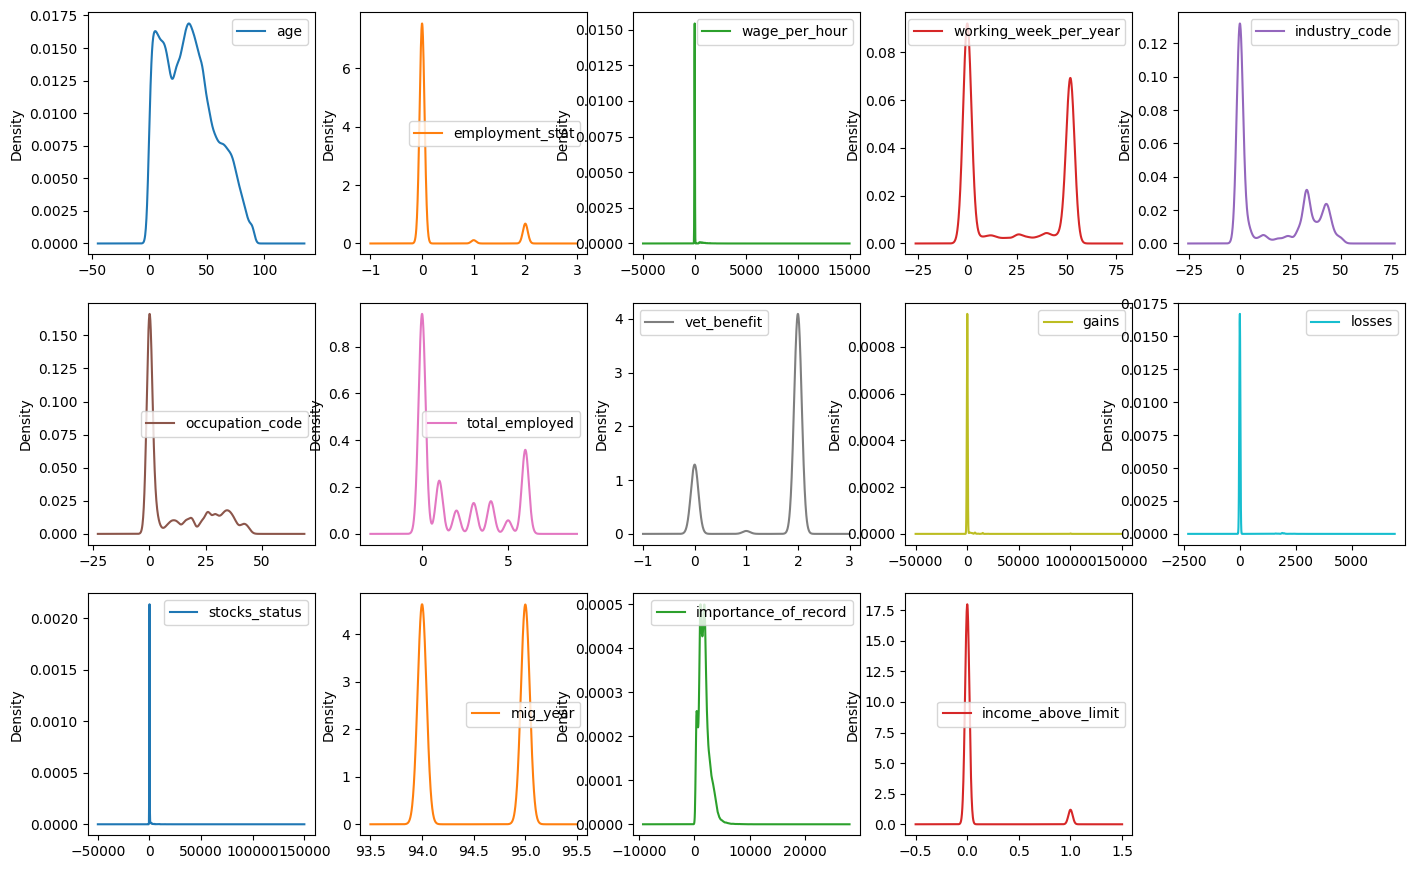

In [39]:
df.plot(kind="density",
                subplots=True,
                layout = (6,5),
                figsize=(17,22),
                sharex=False,
                sharey=False)

# Data Preprocessing

In [40]:
# Checking null values
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.24 %
education_institute               93.65 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
unemployment_reason               96.89 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.42 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.45 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
under_18_family                   72.39 %
veterans_admin_questionnaire      

In [41]:
# dropping columns with too much nan values i.e more than 50%
nan_cols_drop  = []
for cols in df.columns:
    if df[cols].isna().sum()/df.shape[0] >0.5:
        nan_cols_drop.append(cols)

In [42]:
print(f'We will drop the following columns from data: ')
print(nan_cols_drop)

We will drop the following columns from data: 
['class', 'education_institute', 'unemployment_reason', 'is_labor_union', 'occupation_code_main', 'under_18_family', 'veterans_admin_questionnaire', 'migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago', 'old_residence_reg', 'old_residence_state']


In [43]:
print('The shape of data before dropping columns with high proportion of NaN values is - ')
print(f'The shape of data is {df.shape}')

df = df.drop(nan_cols_drop,axis=1)

print('---------------------------------------------------------------------------------------------------\n')
print('The shape of data after dropping columns with high proportion of NaN values is - ')
print(f'The shape of data is {df.shape}')

The shape of data before dropping columns with high proportion of NaN values is - 
The shape of data is (209499, 43)
---------------------------------------------------------------------------------------------------

The shape of data after dropping columns with high proportion of NaN values is - 
The shape of data is (209499, 29)


In [44]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                          0.0 %
age                         0.0 %
gender                      0.0 %
education                   0.0 %
marital_status              0.0 %
race                        0.0 %
is_hispanic                 0.0 %
employment_commitment       0.0 %
employment_stat             0.0 %
wage_per_hour               0.0 %
working_week_per_year       0.0 %
industry_code               0.0 %
industry_code_main          0.0 %
occupation_code             0.0 %
total_employed              0.0 %
household_stat              0.0 %
household_summary           0.0 %
vet_benefit                 0.0 %
tax_status                  0.0 %
gains                       0.0 %
losses                      0.0 %
stocks_status               0.0 %
citizenship                 0.0 %
mig_year                    0.0 %
country_of_birth_own       1.75 %
country_of_birth_father    3.43 %
country_of_birth_mother    3.11 %
importance_of_record        0.0 %
income_above_limit          0.0 %
dtype: object

In [45]:
df = df.drop(['country_of_birth_own','country_of_birth_father','country_of_birth_mother'],axis=1)

In [46]:
df = df.dropna(axis=0)

In [47]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                       0.0 %
age                      0.0 %
gender                   0.0 %
education                0.0 %
marital_status           0.0 %
race                     0.0 %
is_hispanic              0.0 %
employment_commitment    0.0 %
employment_stat          0.0 %
wage_per_hour            0.0 %
working_week_per_year    0.0 %
industry_code            0.0 %
industry_code_main       0.0 %
occupation_code          0.0 %
total_employed           0.0 %
household_stat           0.0 %
household_summary        0.0 %
vet_benefit              0.0 %
tax_status               0.0 %
gains                    0.0 %
losses                   0.0 %
stocks_status            0.0 %
citizenship              0.0 %
mig_year                 0.0 %
importance_of_record     0.0 %
income_above_limit       0.0 %
dtype: object

age                          Axes(0.125,0.77;0.133621x0.11)
employment_stat           Axes(0.285345,0.77;0.133621x0.11)
wage_per_hour              Axes(0.44569,0.77;0.133621x0.11)
working_week_per_year     Axes(0.606034,0.77;0.133621x0.11)
industry_code             Axes(0.766379,0.77;0.133621x0.11)
occupation_code             Axes(0.125,0.638;0.133621x0.11)
total_employed           Axes(0.285345,0.638;0.133621x0.11)
vet_benefit               Axes(0.44569,0.638;0.133621x0.11)
gains                    Axes(0.606034,0.638;0.133621x0.11)
losses                   Axes(0.766379,0.638;0.133621x0.11)
stocks_status               Axes(0.125,0.506;0.133621x0.11)
mig_year                 Axes(0.285345,0.506;0.133621x0.11)
importance_of_record      Axes(0.44569,0.506;0.133621x0.11)
income_above_limit       Axes(0.606034,0.506;0.133621x0.11)
dtype: object

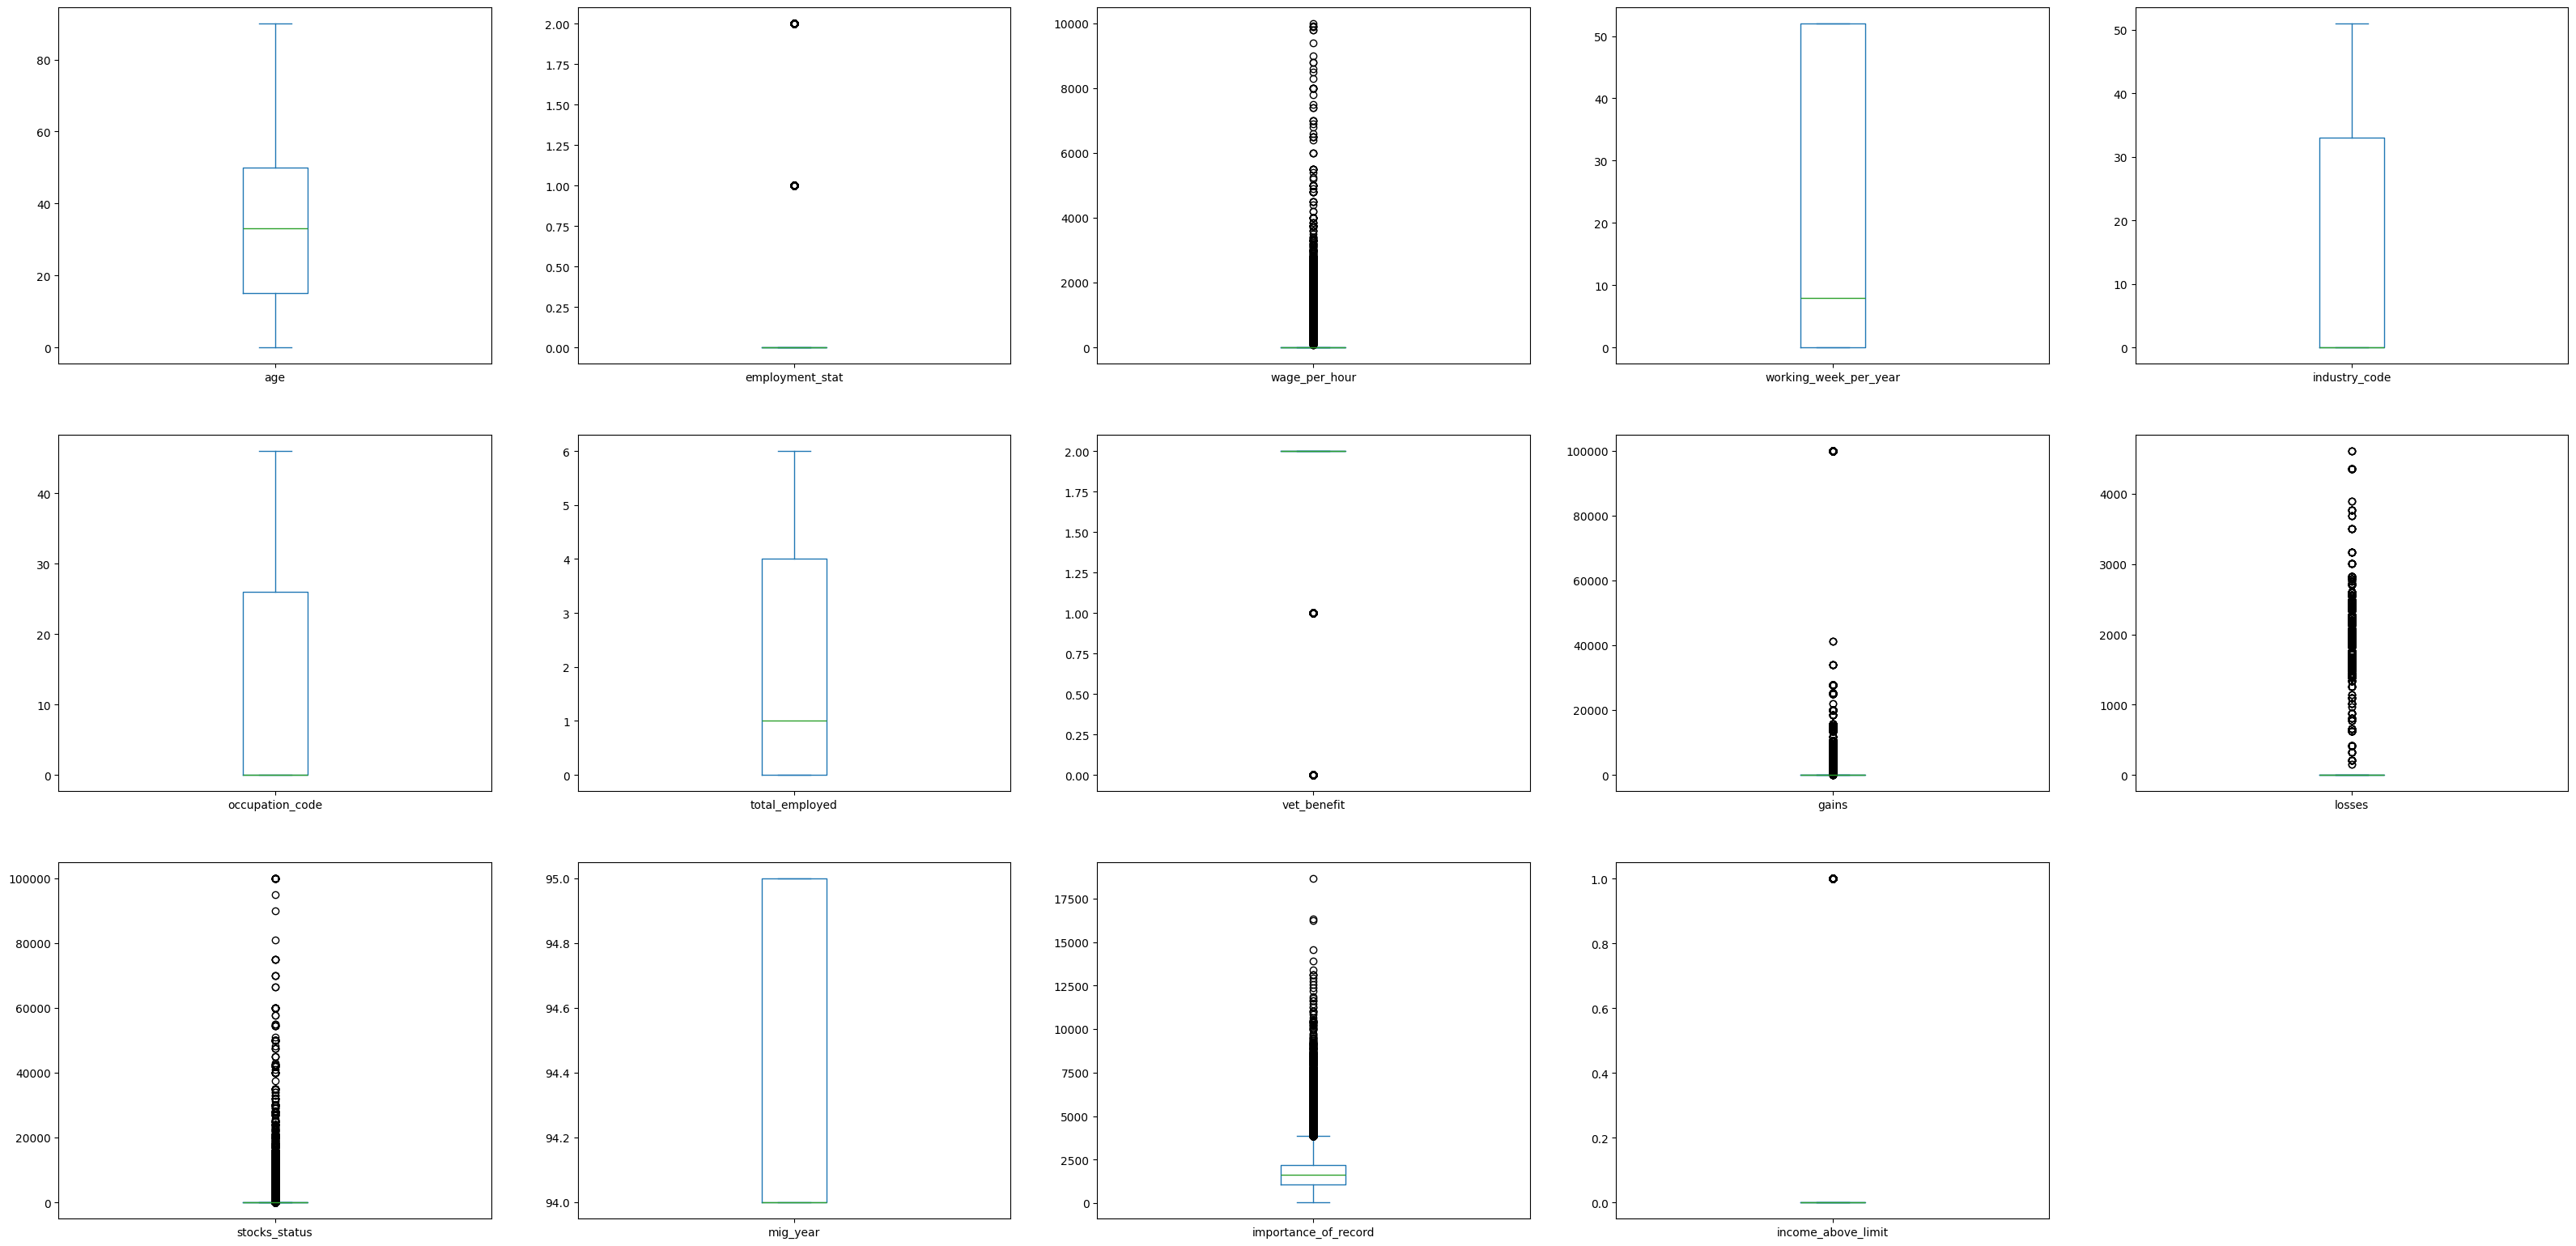

In [48]:
df.plot(kind="box",
                vert=True,
                subplots=True,
                layout = (6,5),
                figsize=(40,40),
                sharex=False,
                sharey=False)

In [49]:
for i in ['wage_per_hour','gains','losses','stocks_status','importance_of_record']:

    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_bridge=df[i].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[i].quantile(0.75)+(IQR*1.5)

    outs = []

    for j in df[i]:
        if j<lower_bridge:
            outs.append(j)

    for k in df[i]:
        if k>upper_bridge:
            outs.append(k)

    print(f'The percentage of outliers in {i}:',(len(outs)/len(df)*100),'%')

The percentage of outliers in wage_per_hour: 5.659215557114831 %
The percentage of outliers in gains: 3.7374880071026593 %
The percentage of outliers in losses: 1.9389114029183911 %
The percentage of outliers in stocks_status: 10.516517978606103 %
The percentage of outliers in importance_of_record: 3.22626838314264 %


In [50]:
df.head()

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,...,Householder,2,Head of household,0,0,292,Native,95,1779.74,0
1,ID_TZ0001,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,...,Householder,2,Single,0,0,0,Native,94,2366.75,0
2,ID_TZ0002,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,...,Child 18 or older,2,Single,0,0,0,Native,94,1693.42,0
3,ID_TZ0003,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,...,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,1380.27,0
4,ID_TZ0004,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,1580.79,0


In [51]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

for i in categorical_feature[1:]:
    print(i,df[i].unique(),'\n')

gender [' Female' ' Male'] 

education [' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)'] 

marital_status [' Widowed' ' Never married' ' Married-civilian spouse present'
 ' Divorced' ' Married-spouse absent' ' Separated'
 ' Married-A F spouse present'] 

race [' White' ' Black' ' Asian or Pacific Islander'
 ' Amer Indian Aleut or Eskimo' ' Other'] 

is_hispanic [' All other' ' Mexican-American' ' Central or South American'
 ' Mexican (Mexicano)' ' Puerto Rican' ' Other Spanish' ' NA' ' Cuban'
 ' Do not know' ' Chicano'] 

employment_commitment [' Not in labor force' ' Children or Armed Forc

In [52]:
df.drop(columns=['household_stat'],axis=1,inplace=True)
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

In [53]:
print('The class Imbalance in the data is given below')
print(df['income_above_limit'].value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{df['income_above_limit'].value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
income_above_limit
0    196501
1     12998
Name: count, dtype: int64 

The class imbalance in terms of percentage is given below 
income_above_limit
0    93.795674
1     6.204326
Name: proportion, dtype: float64


In [54]:
df.isnull().sum()

ID                       0
age                      0
gender                   0
education                0
marital_status           0
race                     0
is_hispanic              0
employment_commitment    0
employment_stat          0
wage_per_hour            0
working_week_per_year    0
industry_code            0
industry_code_main       0
occupation_code          0
total_employed           0
household_summary        0
vet_benefit              0
tax_status               0
gains                    0
losses                   0
stocks_status            0
citizenship              0
mig_year                 0
importance_of_record     0
income_above_limit       0
dtype: int64

In [55]:
x,y = df.drop(['ID','income_above_limit'],axis=1),df['income_above_limit']

In [56]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_random_resampled, Y_random_resampled = ros.fit_resample(x,y)

In [57]:
print('The class Imbalance in the data is given below')
print(Y_random_resampled.value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{Y_random_resampled.value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
income_above_limit
0    196501
1    196501
Name: count, dtype: int64 

The class imbalance in terms of percentage is given below 
income_above_limit
0    50.0
1    50.0
Name: proportion, dtype: float64


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X_random_resampled, Y_random_resampled, test_size=0.2, random_state=42)

In [59]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (314401, 23)
X_test shape: (78601, 23)
Y_train shape: (314401,)
Y_test shape: (78601,)


In [60]:
X_train.reset_index(drop=True,inplace=True)
X_train.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,32,Male,High school graduate,Divorced,White,All other,Children or Armed Forces,0,0,52,...,1,Householder,2,Head of household,0,0,0,Native,94,1207.45
1,74,Female,High school graduate,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,0,...,0,Spouse of householder,2,Nonfiler,0,0,0,Native,94,2242.96
2,43,Male,Associates degree-academic program,Never married,White,All other,Unemployed part- time,0,0,52,...,6,Householder,2,Single,0,0,0,Native,95,3371.85
3,43,Male,Some college but no degree,Never married,White,All other,Full-time schedules,0,0,52,...,6,Householder,2,Single,0,0,125,Native,95,1315.73
4,22,Female,Some college but no degree,Never married,White,Other Spanish,Not in labor force,0,0,0,...,0,Child 18 or older,2,Nonfiler,0,0,0,Native,95,691.33


In [61]:
X_test.reset_index(drop=True,inplace=True)
X_test.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,28,Male,High school graduate,Married-civilian spouse present,White,Puerto Rican,Children or Armed Forces,0,0,52,...,2,Householder,2,Joint both under 65,0,0,0,Native,94,905.79
1,21,Male,High school graduate,Never married,White,All other,Full-time schedules,0,800,45,...,6,Householder,2,Single,27828,0,0,Native,95,1299.69
2,43,Female,Some college but no degree,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,...,6,Spouse of householder,2,Joint both under 65,0,0,0,Native,95,3852.26
3,40,Female,11th grade,Widowed,White,Central or South American,Children or Armed Forces,0,650,52,...,3,Householder,2,Head of household,0,0,0,Native,94,1081.40
4,6,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,...,0,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,3522.25


In [62]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['gender','education','marital_status','race','is_hispanic','employment_commitment','industry_code_main',
                     'household_summary','tax_status','citizenship']

columns_to_keep = X_train.drop(columns_to_encode,axis=1).columns

encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

encoded_columns = encoder.fit_transform(X_train[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

X_train_encoded = pd.concat([encoded_df, X_train[columns_to_keep]], axis=1)

In [63]:
X_train_encoded.head()

,gender_ Female,gender_ Male,education_ 10th grade,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,education_ 5th or 6th grade,education_ 7th and 8th grade,education_ 9th grade,education_ Associates degree-academic program,...,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52,49,33,1,2,0,0,0,94,1207.45
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,2,0,0,0,94,2242.96
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,52,29,15,6,2,0,0,0,95,3371.85
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52,30,14,6,2,0,0,125,95,1315.73
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,2,0,0,0,95,691.33


In [64]:
X_train_encoded.shape

(314401, 105)

In [65]:
encoded_columns = encoder.transform(X_test[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

X_test_encoded = pd.concat([encoded_df, X_test[columns_to_keep]], axis=1)

X_test_encoded.head()

,gender_ Female,gender_ Male,education_ 10th grade,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,education_ 5th or 6th grade,education_ 7th and 8th grade,education_ 9th grade,education_ Associates degree-academic program,...,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52,4,34,2,2,0,0,0,94,905.79
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45,4,39,6,2,27828,0,0,95,1299.69
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52,29,38,6,2,0,0,0,95,3852.26
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52,33,26,3,2,0,0,0,94,1081.40
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,95,3522.25


In [66]:
X_test_encoded.shape

(78601, 105)

In [67]:
Y_train.replace({'Below limit':0,'Above limit':1},inplace=True)
Y_test.replace({'Below limit':0,'Above limit':1},inplace=True)

In [68]:
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X_train_encoded, Y_train)

RandomForestClassifier(random_state=42)

In [69]:
Y_pred_ran_for = ran_for.predict(X_test_encoded)

In [70]:
print('Random Forest Classifier:')
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for), 2))

Random Forest Classifier:
F1 score: 0.99


In [71]:
print(classification_report(Y_test, Y_pred_ran_for))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     39578
           1       0.98      1.00      0.99     39023

    accuracy                           0.99     78601
   macro avg       0.99      0.99      0.99     78601
weighted avg       0.99      0.99      0.99     78601



In [72]:
xgb = XGBClassifier()
xgb.fit(X_train_encoded, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
Y_pred_xgb = xgb.predict(X_test_encoded)

In [74]:
print('XGB Classifier:')
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb), 2))

XGB Classifier:
F1 score: 0.91


In [75]:
print(classification_report(Y_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     39578
           1       0.89      0.94      0.91     39023

    accuracy                           0.91     78601
   macro avg       0.91      0.91      0.91     78601
weighted avg       0.91      0.91      0.91     78601



In [76]:
import evidently
from evidently.report import Report
from evidently.metric_preset import ClassificationPreset
from evidently.pipeline.column_mapping import ColumnMapping

In [77]:
train_probas = pd.DataFrame(ran_for.predict_proba(X_train_encoded))
train_probas.columns = ['Below limit', 'Above limit']

test_probas = pd.DataFrame(ran_for.predict_proba(X_test_encoded))
test_probas.columns = ['Below limit', 'Above limit']

In [78]:
train_data,test_data = X_train_encoded.copy(deep=True),X_test_encoded.copy(deep=True)

In [79]:
train_data.reset_index(inplace=True, drop=True)
train_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_train]
rf_merged_train = pd.concat([train_data, train_probas], axis = 1)

test_data.reset_index(inplace=True, drop=True)
test_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_test]
rf_merged_test = pd.concat([test_data, test_probas], axis = 1)

In [80]:
column_mapping = ColumnMapping()

column_mapping.target = 'income_above_limit'
column_mapping.prediction = ['Above limit', 'Below limit']
column_mapping.pos_label = 'Above limit'

In [81]:
classification_performance_report = Report(metrics=[
    ClassificationPreset(),
])

classification_performance_report.run(reference_data=rf_merged_train, current_data=rf_merged_test, column_mapping = column_mapping)
classification_performance_report.save_html('rf_model.html')

In [82]:
rf_test_probas = pd.DataFrame(ran_for.predict_proba(X_test_encoded))
rf_test_probas.columns = ['Below limit', 'Above limit']

xgb_test_probas = pd.DataFrame(xgb.predict_proba(X_test_encoded))
xgb_test_probas.columns = ['Below limit', 'Above limit']

In [83]:
rf_data,xgb_data = X_test_encoded.copy(deep=True),X_test_encoded.copy(deep=True)

In [84]:
rf_data.reset_index(inplace=True, drop=True)
rf_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_test]
rf_final_data = pd.concat([rf_data, rf_test_probas], axis = 1)

xgb_data.reset_index(inplace=True, drop=True)
xgb_data['income_above_limit'] = ['Below limit' if x == 0 else 'Above limit' for x in Y_test]
xgb_final_data = pd.concat([xgb_data, xgb_test_probas], axis = 1)

In [85]:
column_mapping = ColumnMapping()

column_mapping.target = 'income_above_limit'
column_mapping.prediction = ['Above limit', 'Below limit']
column_mapping.pos_label = 'Above limit'

In [86]:
classification_performance_report = Report(metrics=[
    ClassificationPreset(),
])

classification_performance_report.run(reference_data=xgb_final_data, current_data=rf_final_data, column_mapping = column_mapping)
classification_performance_report.save_html('rf_vs_xgb.html')

In [87]:
import shap
shap.initjs()

c:\Users\Win\anaconda3\envs\python_eda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [88]:
sample_set = X_train_encoded.sample(10)

In [89]:
explainer = shap.Explainer(ran_for)

In [90]:
shap_values_beeswarm = explainer(sample_set,check_additivity=False)

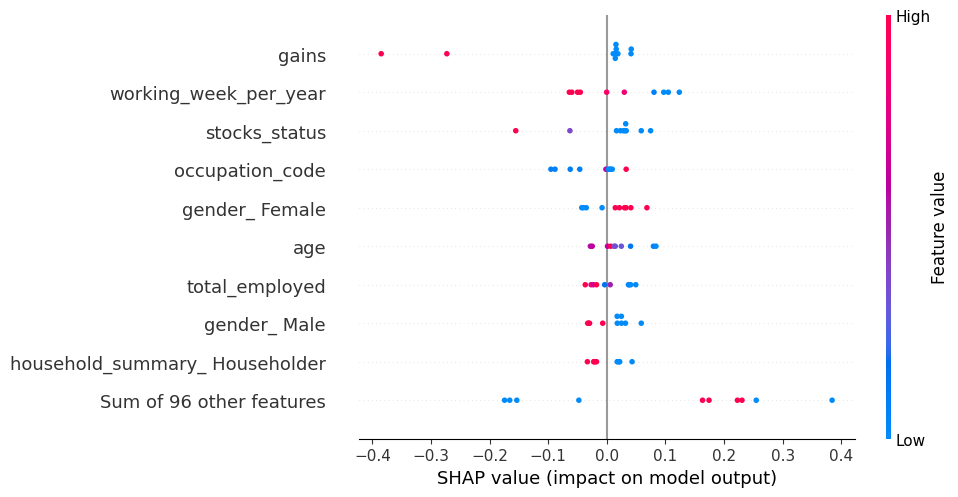

In [91]:
shap.plots.beeswarm(shap_values_beeswarm[:,:,0])

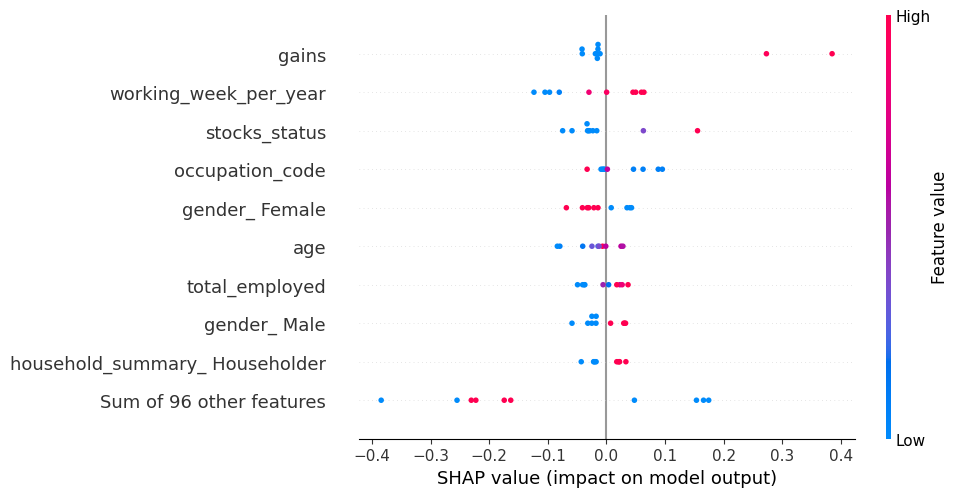

In [92]:
shap.plots.beeswarm(shap_values_beeswarm[:,:,1])